In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import Input

In [4]:
df = pd.read_csv("mieten_in_bayern.csv")

C:\Users\battl\AppData\Local\Temp\ipykernel_12012\3940222591.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mieten_in_bayern.csv")


In [5]:
df.shape


(21965, 50)

In [6]:
df.columns

Index(['Unnamed: 0', 'regio1', 'serviceCharge', 'heatingType',
       'telekomTvOffer', 'telekomHybridUploadSpeed', 'newlyConst', 'balcony',
       'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'scoutId', 'noParkSpaces', 'firingTypes',
       'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent',
       'houseNumber', 'livingSpace', 'geo_krs', 'condition', 'interiorQual',
       'petsAllowed', 'street', 'streetPlain', 'lift', 'baseRentRange',
       'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'regio2', 'regio3', 'description', 'facilities', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice', 'date'],
      dtype='object')

In [7]:
df["Muenchen"] = df["regio2"] == "München"

In [8]:
features = ["yearConstructed", "livingSpace", "telekomUploadSpeed", "lastRefurbish", "Muenchen", "serviceCharge", "balcony"]
y = "totalRent"
X = df[features].copy()

In [9]:
df_model = df[features + [y]].copy()

In [10]:
df_model.rename(columns={
    "balcony": "Balkon",
    "yearConstructed": "Baujahr",
    "livingSpace": "Wohnflaeche",
    "telekomUploadSpeed": "InetGeschwindigkeit",
    "lastRefurbish": "RenovierungsJahr",
    "serviceCharge": "ServiceGebuehr",
    "totalRent": "GesamtMiete"
}, inplace=True)

In [11]:
df_model = df_model.dropna()
df_model = df_model[df_model["RenovierungsJahr"] <= 2026]
df_model = df_model.reset_index(drop=True)

In [12]:
df_model["Muenchen"] = LabelEncoder().fit_transform(df_model["Muenchen"])


In [13]:
df_model["Muenchen"].isnull().sum()



np.int64(0)

In [14]:
df_model["Balkon"].isnull().sum()

np.int64(0)

In [15]:
df_model["Balkon"] = LabelEncoder().fit_transform(df_model["Balkon"])

In [16]:
df_model

,Baujahr,Wohnflaeche,InetGeschwindigkeit,RenovierungsJahr,Muenchen,ServiceGebuehr,Balkon,GesamtMiete
0,1936.0,50.0,40.0,2017.0,0,120.0,1,720.00
1,1999.0,82.0,40.0,2016.0,0,200.0,1,1350.00
2,1993.0,170.0,10.0,2009.0,0,270.0,1,1170.00
3,1920.0,102.0,40.0,2015.0,0,165.0,0,735.00
4,2008.0,160.0,40.0,2019.0,0,300.0,0,2250.00
...,...,...,...,...,...,...,...,...
4321,1980.0,106.9,40.0,2019.0,1,165.0,1,1810.17
4322,1990.0,114.0,40.0,2017.0,0,285.0,1,1539.00
4323,1985.0,31.0,2.4,2019.0,1,0.0,1,1290.00
4324,1960.0,55.0,40.0,2015.0,0,120.0,0,670.00


In [17]:
df_model.isnull().sum()


Baujahr                0
Wohnflaeche            0
InetGeschwindigkeit    0
RenovierungsJahr       0
Muenchen               0
ServiceGebuehr         0
Balkon                 0
GesamtMiete            0
dtype: int64

In [18]:
(df_model["Baujahr"] > 2020).sum()

np.int64(0)

In [19]:
X = df_model.drop(columns="GesamtMiete")
y = df_model["GesamtMiete"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler=StandardScaler()
outScaler=StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X_val= scaler.transform(X_val)

In [23]:
X_train_df = pd.DataFrame(X_train, columns=X.columns) ##Hier wird aus X_train ein Pandas DataFrame gebaut.

##Damit die Spaltennamen nicht verloren gehen, werden sie von X.columns übernommen (also von
X_train_df.head(5)

,Baujahr,Wohnflaeche,InetGeschwindigkeit,RenovierungsJahr,Muenchen,ServiceGebuehr,Balkon
0,0.212468,0.051126,0.658933,-1.388078,-0.570675,0.843522,0.577795
1,0.763755,0.007929,0.658933,-0.348207,-0.570675,0.617187,0.577795
2,-0.176675,-0.027697,0.658933,0.483690,1.752309,2.110996,0.577795
3,0.844826,0.039992,0.658933,0.691665,-0.570675,1.975195,0.577795
4,-0.111818,-0.025025,0.658933,-0.140232,-0.570675,-0.627653,-1.730717


In [24]:
y_train = outScaler.fit_transform(pd.DataFrame(y_train))
y_test = outScaler.transform(pd.DataFrame(y_test))  

y_val = outScaler.transform(pd.DataFrame(y_val))                            ##Wenn du ein reines 1D-Array 
                                                                                ##übergibst, gibt es oft einen Fehler oder eine Warnung.

In [25]:

print(tf.__version__)


2.20.0


In [26]:
#Define the model

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation = "relu"), 
    Dense(32, activation = "relu"),
    Dense(1)
])

In [27]:
#Compile the model

model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)



In [28]:
#Modell füttern bzw. trainieren

history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 32,
    validation_data = (X_val, y_val),
    verbose = 1
)


Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4698 - mae: 0.4433 - val_loss: 0.3456 - val_mae: 0.3973
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3766 - mae: 0.3970 - val_loss: 0.3321 - val_mae: 0.3830
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3414 - mae: 0.3870 - val_loss: 0.3214 - val_mae: 0.3764
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3486 - mae: 0.3782 - val_loss: 0.3127 - val_mae: 0.3761
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3562 - mae: 0.3818 - val_loss: 0.3138 - val_mae: 0.3763
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3301 - mae: 0.3741 - val_loss: 0.3100 - val_mae: 0.3703
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3127 - mae: 0.3657 - val_loss: 0.3020 - val_mae: 0.3707
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3092 - mae: 0.3641 - val_loss: 0.2981 - val_mae: 0.3586
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

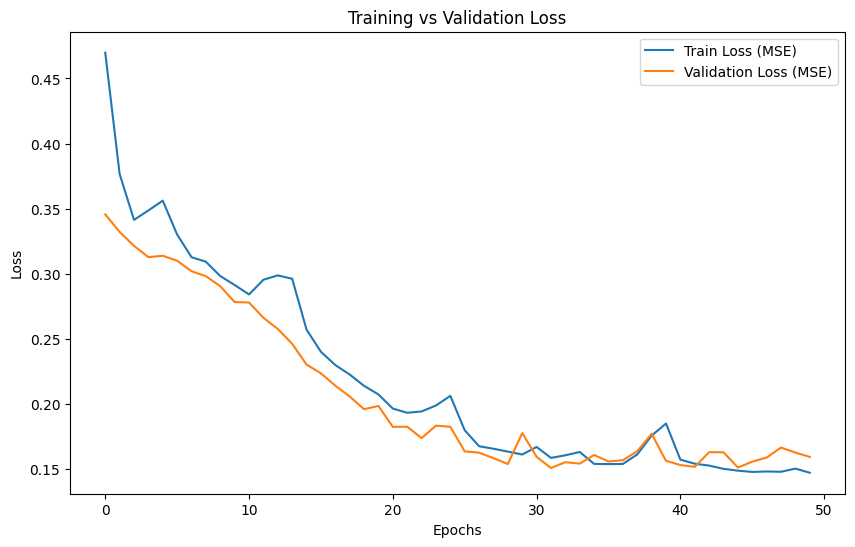

In [29]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [30]:
 model.evaluate(X_test, y_test, verbose=1)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1593 - mae: 0.2828


[0.1592937558889389, 0.2828342318534851]

In [31]:
df_model["GesamtMiete"].mean()

np.float64(1228.2162020342118)

In [32]:
# MAE in skalierten Daten
mae_scaled = 0.3236

# Min und Max der Trainingsdaten
y_min = df_model['GesamtMiete'].min()
y_max = df_model['GesamtMiete'].max()

# MAE zurückrechnen auf €
mae_real = mae_scaled * (y_max - y_min)
print(mae_real)


4174.44


In [33]:
# MAE in skalierten Daten
mae_scaled = 0.3236

# Standardabweichung der Trainingsdaten
y_std = df_model['GesamtMiete'].std()

# MAE zurückrechnen auf €
mae_real = mae_scaled * y_std
print(mae_real)


246.36579083813584


In [34]:
# Now, im visualizing the model with Prediction
y_pred_scaled = model.predict(X_test)
y_pred = outScaler.inverse_transform(y_pred_scaled)

y_test_euro = outScaler.inverse_transform(y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


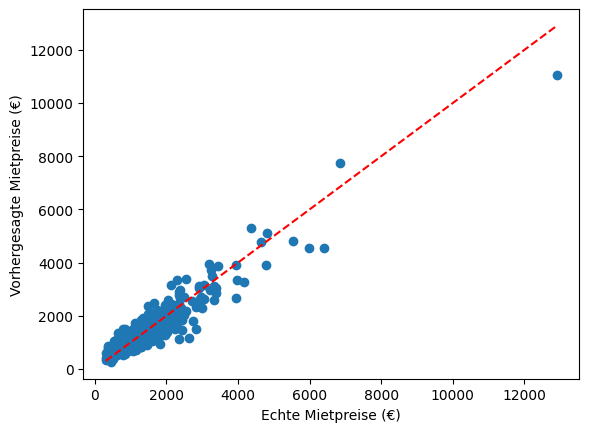

In [35]:
##Positive stare Korrelation zwischen Vorhersage und echte Mietpreisen
plt.scatter(y_test_euro, y_pred)
plt.xlabel("Echte Mietpreise (€)")
plt.ylabel("Vorhergesagte Mietpreise (€)")
plt.plot([y_test_euro.min(), y_test_euro.max()],
         [y_test_euro.min(), y_test_euro.max()],
         'r--')  # perfekte Vorhersage
plt.show()

In [38]:
model.save("rent_price_pred.keras")

In [41]:
import joblib

joblib.dump(outScaler, "y_scaler.pkl")
joblib.dump(scaler, "x_scaler.pkl")

['x_scaler.pkl']